In [1]:
import networkx as nx
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import dtreeviz

In [2]:
g = nx.readwrite.read_gml("polblogs.gml")
g = nx.DiGraph(g)
y = list(nx.get_node_attributes(g,"value").values())   # Vector de valores de clasificacion correcto, tambien usado para colorear los nodos

In [ ]:
#nx.draw(g,node_size=10,node_color=y)
#plt.show()

In [3]:
centralidad_grado = list(nx.algorithms.degree_centrality(g).values())
centralidad_cercania = list(nx.algorithms.closeness_centrality(g).values())
centralidad_betweness = list(nx.algorithms.betweenness_centrality(g).values())
centralidad_eigenvector = list(nx.algorithms.eigenvector_centrality(g).values())
coeficientes_clustering = list(nx.algorithms.cluster.clustering(g).values())
clf = tree.DecisionTreeClassifier(max_depth=4)

In [ ]:
X = list([x,y,z,w,h] for x,y,z,w,h in zip(centralidad_grado,centralidad_cercania,centralidad_betweness,centralidad_eigenvector,coeficientes_clustering))


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [8]:
clf.score(X_test,y_test)

0.7050938337801609

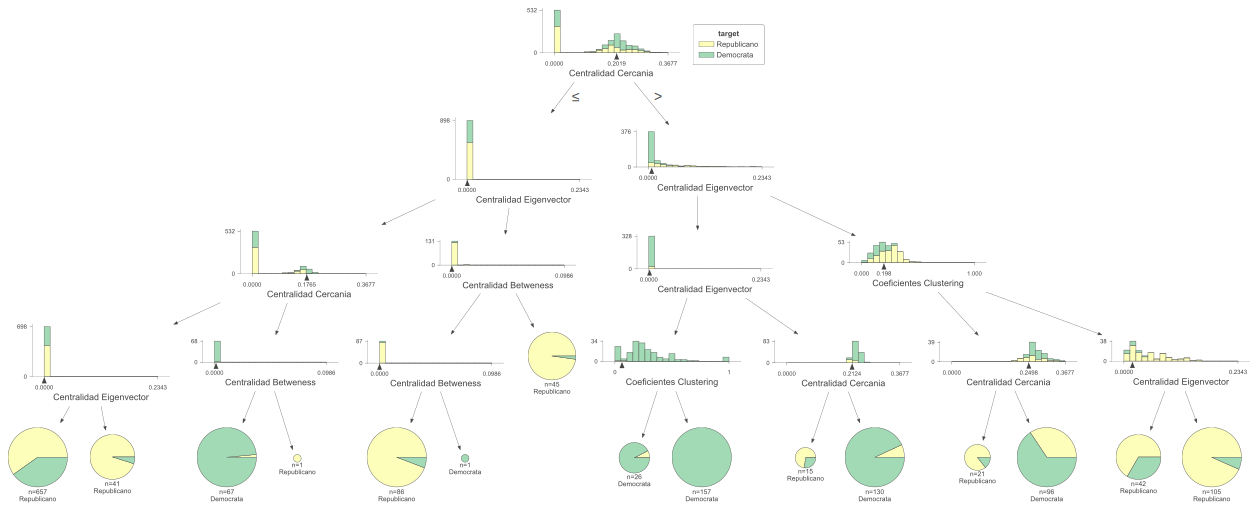

In [9]:
import numpy as np
viz = dtreeviz.model(clf, np.array(X,dtype=np.float64), np.array(y,dtype=np.int32),
                target_name="target",
                feature_names= ["Centralidad Grado", "Centralidad Cercania", "Centralidad Betweness","Centralidad Eigenvector","Coeficientes Clustering"],
                class_names= ["Republicano", "Democrata"])
viz.view()

In [ ]:
v = viz.view()
v.save("viz.svg")


In [10]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
y_iris
data = np.array(X, dtype=np.float32)
data

array([[1.8132975e-02, 2.0840926e-01, 4.7010188e-05, 5.7780677e-03,
        2.4142857e-01],
       [3.2236401e-02, 1.7051208e-01, 7.6295907e-04, 5.2095280e-04,
        2.2977778e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       ...,
       [6.7159167e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.4775016e-02, 2.1378717e-01, 9.2743337e-04, 1.4206864e-03,
        2.3568282e-01],
       [6.7159167e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [ ]:
type(y_iris[0])